<a href="https://colab.research.google.com/github/Durgeshshinde/ProdigyInfoTech_DS/blob/main/Hitsogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"durgeshshinde","key":"d411889d67916767df0a1890cea7df6d"}'}

In [5]:
!cp kaggle.json ~/.kaggle/

In [9]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d victornascimento/baccarat-dataset

 98% 165M/169M [00:02<00:00, 94.3MB/s]
100% 169M/169M [00:02<00:00, 76.0MB/s]


In [11]:
!unzip baccarat-dataset.zip -d .


Streaming output truncated to the last 5000 lines.
  inflating: ./data/data/b954999589.json  
  inflating: ./data/data/b955009829.json  
  inflating: ./data/data/b955018173.json  
  inflating: ./data/data/b955028980.json  
  inflating: ./data/data/b955034279.json  
  inflating: ./data/data/b955049322.json  
  inflating: ./data/data/b955055306.json  
  inflating: ./data/data/b955061028.json  
  inflating: ./data/data/b95506911.json  
  inflating: ./data/data/b955071519.json  
  inflating: ./data/data/b955085841.json  
  inflating: ./data/data/b955098557.json  
  inflating: ./data/data/b955109310.json  
  inflating: ./data/data/b955111360.json  
  inflating: ./data/data/b955123497.json  
  inflating: ./data/data/b955132249.json  
  inflating: ./data/data/b955144630.json  
  inflating: ./data/data/b955152099.json  
  inflating: ./data/data/b955161727.json  
  inflating: ./data/data/b95516659.json  
  inflating: ./data/data/b955172368.json  
  inflating: ./data/data/b955189875.json  
  inf

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
%pylab inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import json

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
files = os.listdir("data/data/")#receives a baccarat hand and returns its numeric value
def baccarat_value(v):
    total = 0
    faces = '0JQK'

    for i in v:
        if i[0] == 'A':
            total += 1
        elif i[0] in faces:
            total += 0
        else:
            total += int(i[0])

    if total >= 20: #just for sanity
        total -=20
    elif total >= 10:
        total -= 10

    return total
#receives two hands, player and banker and returns
def baccarat_win(p_hand, b_hand):
    p, b = baccarat_value(p_hand), baccarat_value(b_hand)

    if p == b:
        return 2
    elif p > b:
        return 1
    else:
        return 0
#receives a shoe with premade hands and extract some statistics
def resolve_shoe(shoe):
    num_hands = 0
    num_player = 0
    num_banker = 0
    num_tie = 0
    num_dragon = 0
    num_panda = 0
    curve = [0]

    for i in shoe['hands']:
        resolve = baccarat_win(i[0], i[1])
        if resolve == 2:
            num_tie +=1
            curve.append(curve[-1])
        elif resolve == 1:
            num_player += 1
            curve.append(curve[-1] - 1)
            if len(i[0]) == 3 and baccarat_value(i[0]) == 8:
                num_panda += 1
        elif resolve == 0: #sanity
            num_banker += 1
            curve.append(curve[-1] + 1)
            if len(i[1]) == 3 and baccarat_value(i[1]) == 7:
                num_dragon += 1

    return np.array([num_player, num_banker, num_tie, num_dragon, num_panda, num_hands, curve],dtype=object)
# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib


In [23]:
res = []
for i in files:
    with open("data/data/{}".format(i)) as file:
        data = json.load(file)
        res.append(resolve_shoe(data))

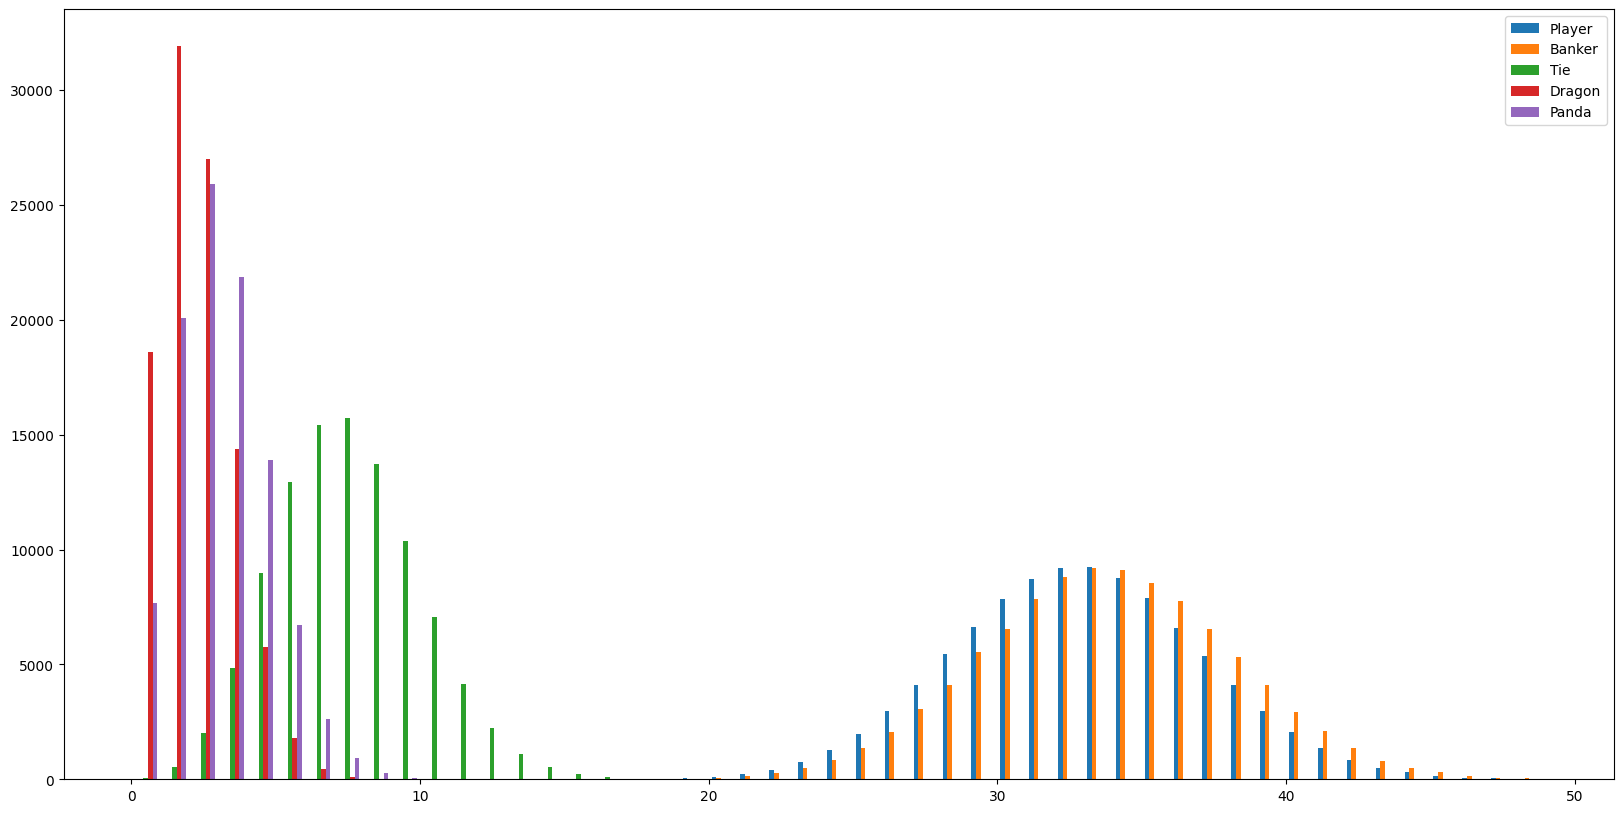

In [24]:
res = np.array(res)
plt.figure(figsize=(20,10))
labels = ['Player', 'Banker', 'Tie', 'Dragon', 'Panda']
hist(res[:, :5],bins=range(0, 50, 1), label=labels)
legend()
show()

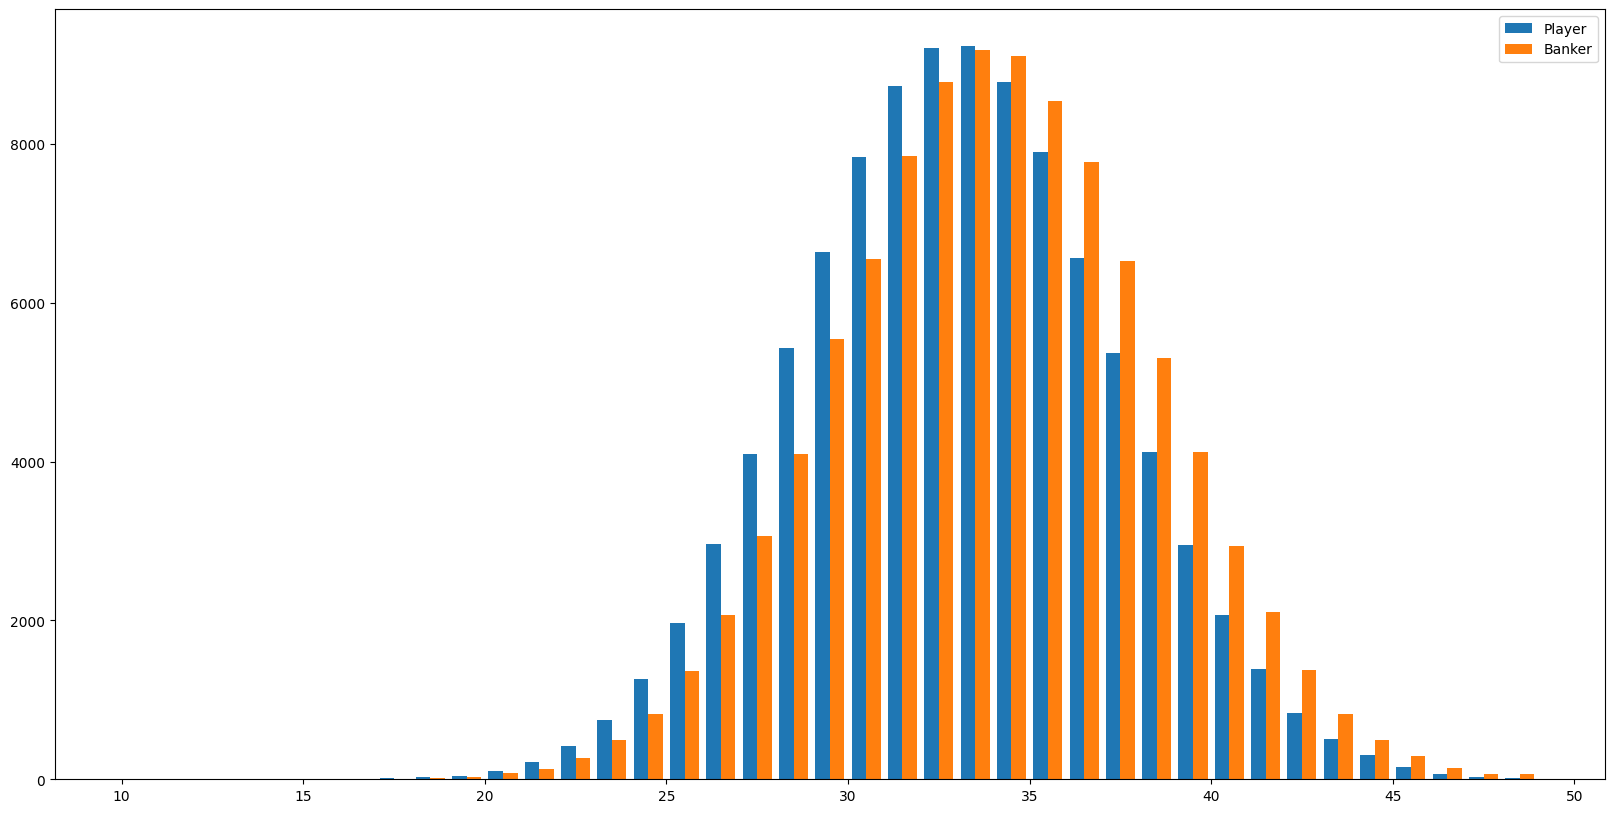

In [25]:
plt.figure(figsize=(20,10))
hist(res[:, :2],bins=range(10, 50, 1), label=['Player','Banker'])
legend()
show()

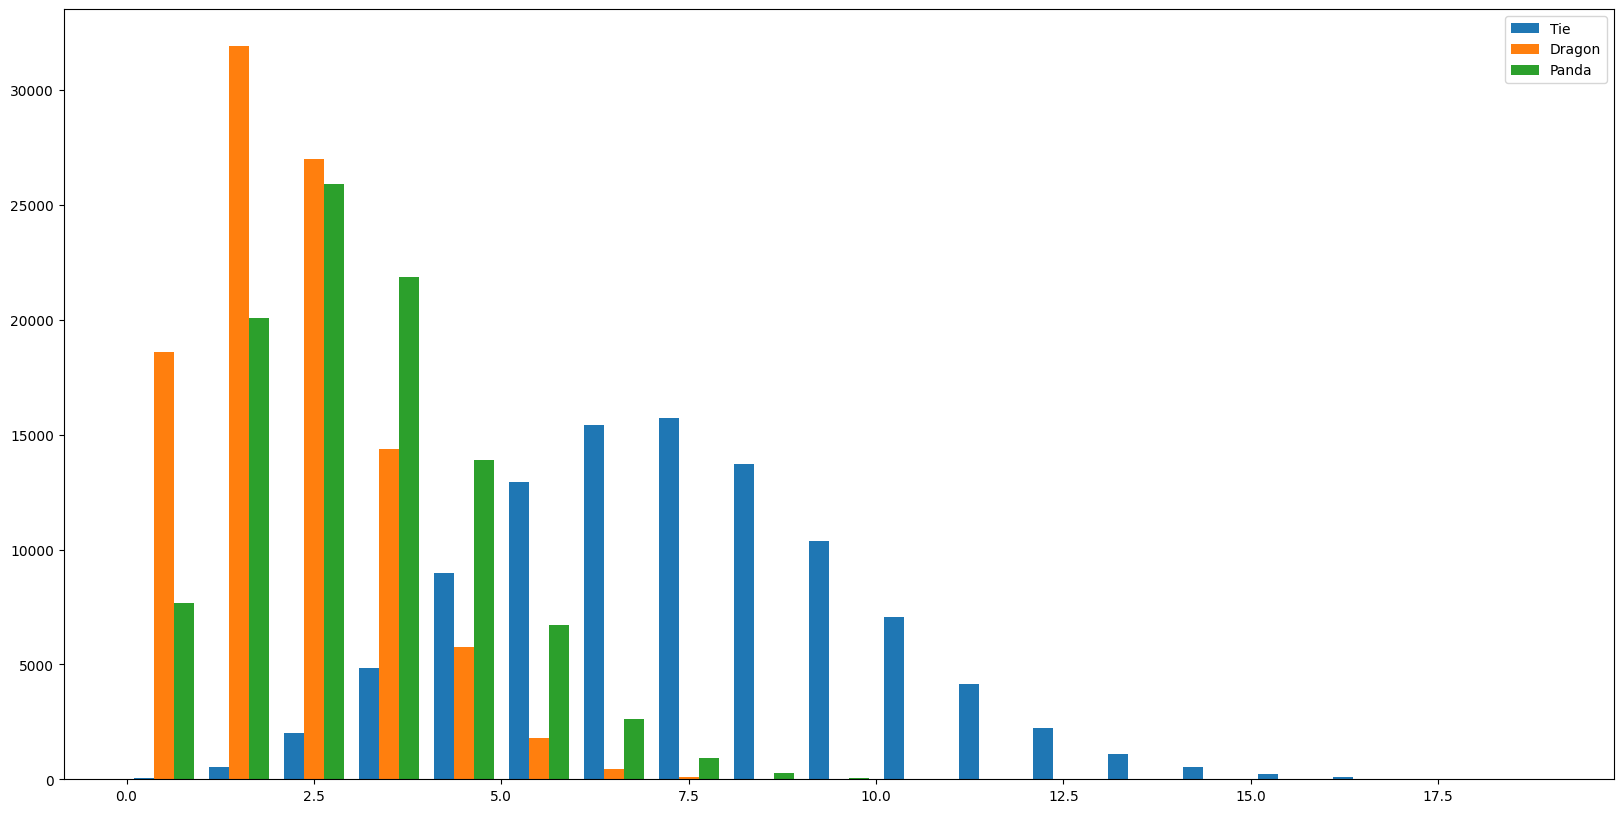

In [26]:
plt.figure(figsize=(20,10))
hist(res[:, 2:5],bins=range(0, 20, 1), label=['Tie','Dragon', 'Panda'])
legend()
show()